In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4" 


In [2]:
# Load dataset
df = pd.read_csv('Wine_clust.csv')

In [3]:
# Data preprocessing (handling missing values if any)
df.dropna(inplace=True)

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(df)

In [4]:
# Finding optimum number of clusters for K-Means
silhouette_scores = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

optimum_k = k_range[np.argmax(silhouette_scores)]
print(f'Optimum number of clusters for K-Means: {optimum_k}')

# K-Means Clustering with optimum k
kmeans = KMeans(n_clusters=optimum_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)
kmeans_score = silhouette_score(X, kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_score:.4f}')

Optimum number of clusters for K-Means: 3
K-Means Silhouette Score: 0.2849


In [5]:
# Finding optimum epsilon for DBSCAN
eps_values = np.arange(0.5, 3, 0.1)
best_eps = 0
best_score = -1
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)
    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_eps = eps

print(f'Optimum epsilon for DBSCAN: {best_eps}')

# DBSCAN Clustering with optimum epsilon
dbscan = DBSCAN(eps=best_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
dbscan_score = silhouette_score(X, dbscan_labels) if len(set(dbscan_labels)) > 1 else 'N/A'
print(f'DBSCAN Silhouette Score: {dbscan_score}')

Optimum epsilon for DBSCAN: 2.8999999999999995
DBSCAN Silhouette Score: 0.21509618297707717


In [6]:
# Finding optimum number of clusters for Agglomerative Clustering
silhouette_scores_agglo = []
k_range_agglo = range(2, 10)
for k in k_range_agglo:
    agglo = AgglomerativeClustering(n_clusters=k)
    labels = agglo.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores_agglo.append(score)

optimum_k_agglo = k_range_agglo[np.argmax(silhouette_scores_agglo)]
print(f'Optimum number of clusters for Agglomerative Clustering: {optimum_k_agglo}')

# Agglomerative Clustering with optimum k
agglo = AgglomerativeClustering(n_clusters=optimum_k_agglo)
agglo_labels = agglo.fit_predict(X)
agglo_score = silhouette_score(X, agglo_labels)
print(f'Agglomerative Clustering Silhouette Score: {agglo_score:.4f}')

Optimum number of clusters for Agglomerative Clustering: 3
Agglomerative Clustering Silhouette Score: 0.2774


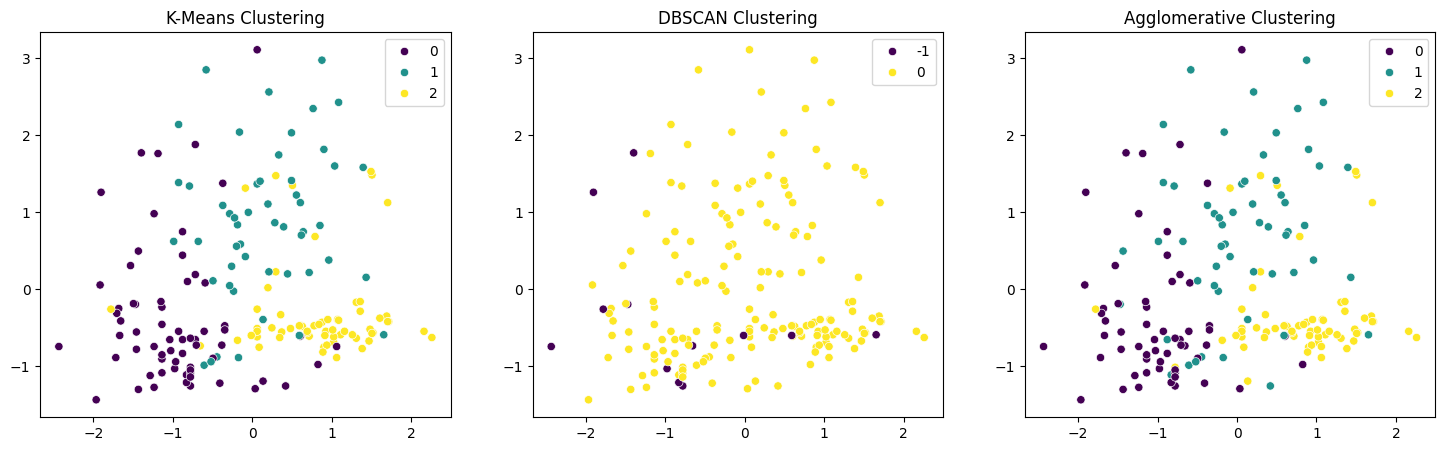

In [7]:
# Visualizing Clustering Results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans_labels, palette='viridis', ax=axes[0])
axes[0].set_title('K-Means Clustering')

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=dbscan_labels, palette='viridis', ax=axes[1])
axes[1].set_title('DBSCAN Clustering')

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=agglo_labels, palette='viridis', ax=axes[2])
axes[2].set_title('Agglomerative Clustering')

plt.show()

In [8]:
# Final K-Means Model with Optimum k
optimum_k = 3
kmeans = KMeans(n_clusters=optimum_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Cluster Centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Save clustered dataset
df.to_csv('Wine_clust_final.csv', index=False)
print("Final clustered dataset saved as 'Wine_clust_final.csv'")


Final clustered dataset saved as 'Wine_clust_final.csv'


In [9]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1
